# Experiment with `bmi_cfe`

In [1]:
!pip install bmipy

In [2]:
%cd /home/jovyan/data/home/jovyan/cfe_py/
%pwd

/home/jovyan/data/home/jovyan/cfe_py


'/home/jovyan/data/home/jovyan/cfe_py'

In [3]:
import numpy as np
from bmi_cfe import BMI_CFE

Create a `toybmi` object and call some basic methods:

# Experiment with the package

In [15]:
cfe = BMI_CFE()
print("Input variables:")
print(cfe.get_input_var_names())
print("Output variables:")
print(cfe.get_output_var_names())

Input variables:
['atmosphere_water__time_integral_of_precipitation_mass_flux', 'water_potential_evaporation_flux']
Output variables:
['land_surface_water__runoff_depth', 'land_surface_water__runoff_volume_flux', 'DIRECT_RUNOFF', 'GIUH_RUNOFF', 'NASH_LATERAL_RUNOFF', 'DEEP_GW_TO_CHANNEL_FLUX', 'SOIL_CONCEPTUAL_STORAGE']


In [16]:
cfe.initialize(bmi_cfg_file_name='cat58_config_cfe.json')

In [17]:
w_input = np.array([42.0])
cfe.set_value('atmosphere_water__time_integral_of_precipitation_mass_flux', w_input)
rh_input = np.array([0.5])
cfe.set_value('water_potential_evaporation_flux', rh_input)

In [18]:
timestep_max = 3600
output = np.zeros(timestep_max)

for i in range(0, timestep_max):
    cfe.update()
    output[i] = cfe.get_value('land_surface_water__runoff_depth')

# Experiment with the ngen (installed on CUAHSI SI Jupyter Hub)

In [4]:
!ngen /home/jovyan/data/shared-data/ngen-example-data/catchment_data.geojson "cat-67" /home/jovyan/data/shared-data/ngen-example-data/nexus_data.geojson "nex-68" bmicfe_realization.json

NGen Framework 0.1.0
Building Nexus collection
Building Catchment collection
Not Using Routing
Catchment topology is dendritic.
Running Models
Running timestep 0
terminate called after throwing an instance of 'std::runtime_error'
  what():  (Bmi_Py_Adapter) Failed determining analogous C++ type for Python model '0.0' type with size 4 bytes.


# Plot results

In [ ]:
!ngen catchment_data.geojson "cat-67" nexus_data.geojson "nex-68" bmicfe_realization.json

In [2]:
import pandas as pd
from datetime import datetime
import csv

df = pd.read_csv('./cat-67.csv')
df['Time'] = df['Time'].map(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))
print (df)

     Time Step                Time  water_output
0            0 2015-12-01 00:00:00  0.000000e+00
1            1 2015-12-01 01:00:00  0.000000e+00
2            2 2015-12-01 02:00:00  0.000000e+00
3            3 2015-12-01 03:00:00  0.000000e+00
4            4 2015-12-01 04:00:00  0.000000e+00
..         ...                 ...           ...
715        715 2015-12-30 19:00:00 -3.000000e-07
716        716 2015-12-30 20:00:00 -2.700000e-07
717        717 2015-12-30 21:00:00 -2.030000e-07
718        718 2015-12-30 22:00:00 -6.170000e-07
719        719 2015-12-30 23:00:00 -2.030000e-07

[720 rows x 3 columns]


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# plot
plt.plot(df["Time"],df["water_output"])
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

# Examples from toybmi

In [5]:
toy = toybmi()
print("Input variables:")
print(toy.get_input_var_names())
print("Output variables:")
print(toy.get_output_var_names())

Input variables:
['water_input', 'relative_humidity']
Output variables:
['water_output']


Initialize the model:

In [6]:
toy.initialize('config.yml')

Set some input values:

In [7]:
w_input = np.array([42.0])
toy.set_value('water_input', w_input)
rh_input = np.array([0.5])
toy.set_value('relative_humidity', rh_input)

Increment the model by an hour:

In [8]:
toy.update_until(3600)

Read the output:

In [16]:
output = np.zeros(1)
cfe.get_value('land_surface_water__runoff_depth')

7.812212876601165e-10

Run `toybmi` in the Model Engine:

In [13]:
!ngen /home/jovyan/data/shared-data/ngen-example-data/catchment_data.geojson "cat-67" /home/jovyan/data/shared-data/ngen-example-data/nexus_data.geojson "nex-68" toybmi_realization.json

NGen Framework 0.1.0
Building Nexus collection
Building Catchment collection
Not Using Routing
Catchment topology is dendritic.
Running Models
Running timestep 0
Definition of "au" in "/usr/share/xml/udunits/udunits2-accepted.xml", line 123, overrides prefixed-unit "1.6605402e-45 kilogram"
Definition of "kt" in "/usr/share/xml/udunits/udunits2-common.xml", line 105, overrides prefixed-unit "1000000 kilogram"
Definition of "microns" in "/usr/share/xml/udunits/udunits2-common.xml", line 411, overrides prefixed-unit "1e-15 second"
Definition of "ft" in "/usr/share/xml/udunits/udunits2-common.xml", line 522, overrides prefixed-unit "1e-12 kilogram"
Definition of "yd" in "/usr/share/xml/udunits/udunits2-common.xml", line 531, overrides prefixed-unit "8.64e-20 second"
Definition of "pt" in "/usr/share/xml/udunits/udunits2-common.xml", line 785, overrides prefixed-unit "1e-09 kilogram"
Definition of "at" in "/usr/share/xml/udunits/udunits2-common.xml", line 1250, overrides prefixed-unit "1e-1

View the results:

In [14]:
import pandas as pd
from datetime import datetime
import csv

df = pd.read_csv('./cat-67.csv')
df['Time'] = df['Time'].map(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))
print (df)

     Time Step                Time  water_output
0            0 2015-12-01 00:00:00  0.000000e+00
1            1 2015-12-01 01:00:00  0.000000e+00
2            2 2015-12-01 02:00:00  0.000000e+00
3            3 2015-12-01 03:00:00  0.000000e+00
4            4 2015-12-01 04:00:00  0.000000e+00
..         ...                 ...           ...
715        715 2015-12-30 19:00:00 -3.000000e-07
716        716 2015-12-30 20:00:00 -2.700000e-07
717        717 2015-12-30 21:00:00 -2.030000e-07
718        718 2015-12-30 22:00:00 -6.170000e-07
719        719 2015-12-30 23:00:00 -2.030000e-07

[720 rows x 3 columns]


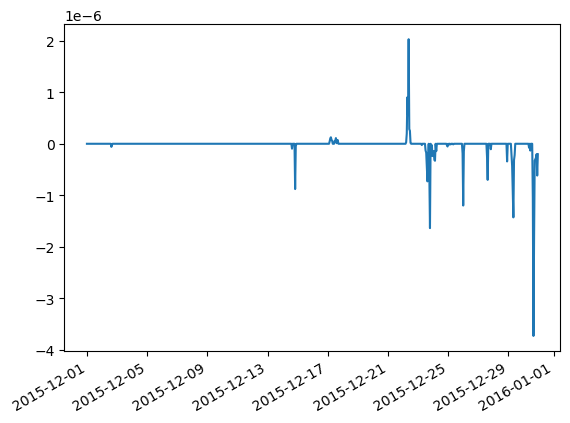

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# plot
plt.plot(df["Time"],df["water_output"])
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()